In [124]:
import pandas as pd
import numpy as np
import math

In [2]:
# re-import & make the date the index & convert the datatype to DATE
dateparse = lambda dates:pd.datetime.strptime(dates,'%m/%d/%Y')
close_prices = pd.read_csv('close_prices.csv', index_col = 'DATE', parse_dates = ['DATE'], date_parser = dateparse)
# delete the columns that have too many missing values
frac = len(close_prices) * 0.8
close_prices = close_prices.dropna(thresh=frac, axis=1)
# filling nan by the closest values
close_prices = close_prices.ffill(limit = None)
close_prices = close_prices.bfill(limit = None)
close_prices = close_prices.ffill(limit = None)
close_prices.isnull().values.sum()

0

In [3]:
close_prices

A    AAC   AAOI      AAP    AAT    AAV   AAWW   AAXJ   ABAC  \
DATE                                                                            
2018-01-01  28.6358  18.50   9.96  13.9000  21.25  8.080  16.75  49.77  21.40   
2018-01-02  27.2040  18.65  10.10  14.2834  21.31  8.100  16.75  49.77  17.00   
2018-01-03  29.3517  19.24  10.00  13.7830  21.31  8.020  16.75  50.13  16.96   
2018-01-04  27.1198  19.24  10.00  13.2330  21.37  7.880  16.75  49.00  16.08   
2018-01-05  27.6676  19.13   9.97  14.6670  21.25  7.850  16.75  48.34  15.92   
...             ...    ...    ...      ...    ...    ...    ...    ...    ...   
2018-09-15  26.4885  23.40  17.10  16.8200  19.92  7.525  31.50  50.26  11.48   
2018-09-16  28.7200  23.47  17.10  16.6270  20.30  7.460  31.00  49.71  11.28   
2018-09-17  29.2254  22.25  17.77  17.3033  20.73  7.460  30.50  48.90  10.64   
2018-09-18  28.0462  22.59  16.96  17.3033  20.43  7.520  30.60  49.51  11.24   
2018-09-19  31.9205  24.43  16.81  17.1830  20.69  7.530  31.00  50.11  11.76   

              ABB  ...   ZNGA      ZNH   ZOES   ZSAN    ZTO    ZTS    ZUMZ  \
DATE               ...                                                       
2018-01-01  24.06  ...  9.500  21.0000  24.72  220.2  16.57  31.01  12.435   
2018-01-02  23.22  ...  9.050  20.6667  25.10  221.0  16.99  31.02  12.255   
2018-01-03  23.22  ...  9.240  20.5000  25.20  224.0  16.93  31.04  12.050   
2018-01-04  23.22  ...  9.470  20.5000  28.21  221.8  16.00  31.03  12.125   
2018-01-05  23.22  ...  9.470  20.3753  27.89  221.8  16.00  32.00  11.750   
...           ...  ...    ...      ...    ...    ...    ...    ...     ...   
2018-09-15  30.75  ...  2.450   4.0000  32.21   39.4  15.38  31.44  34.210   
2018-09-16  30.75  ...  2.625   3.9167  33.34   39.4  15.57  30.78  32.880   
2018-09-17  30.75  ...  2.620   3.9587  33.55   46.0  15.63  30.67  35.210   
2018-09-18  30.00  ...  2.540   3.7920  34.09   50.2  15.54  30.36  34.820   
2018-09-19  30.00  ...  2.540   3.9587  34.09   45.6  15.73  30.36  34.820   

               ZX   ZYME   ZYNE  
DATE                             
2018-01-01  5.850  13.00  16.25  
2018-01-02  6.250  13.07  19.32  
2018-01-03  6.300  13.10  24.54  
2018-01-04  6.040  13.28  35.14  
2018-01-05  6.080  13.11  29.73  
...           ...    ...    ...  
2018-09-15  3.492  11.98   8.84  
2018-09-16  3.520  11.98   9.20  
2018-09-17  3.520  11.98   8.80  
2018-09-18  3.470  11.98   9.43  
2018-09-19  3.460  11.98  10.50  

[262 rows x 3568 columns]

### check stationarity


In [32]:
from statsmodels.tsa.stattools import adfuller

In [43]:
def stationarity (column, name):
    # rolling statistics
    rolmean = column.rolling(12).mean()
    rolstd = column.rolling(12).std()
    
    # plot
    orig = plt.plot(column, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey-Fuller test
    print(str(name))
    print()
    print('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(column, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    # print
    print(dfoutput)
    print()

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonality (column, name):
    # decomposition
    decomposition = seasonal_decompose(column)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    print(name)
    print()
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return residual

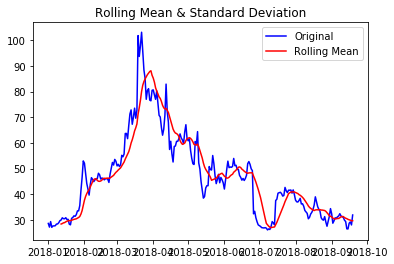

A

Results of Dickey-Fuller Test:

Test Statistic                  -1.615530
p-value                          0.475074
#Lags Used                       8.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64



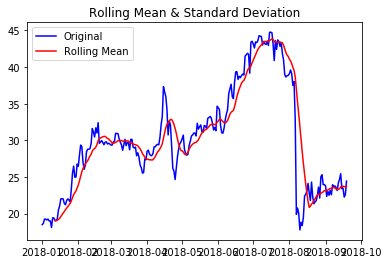

AAC

Results of Dickey-Fuller Test:

Test Statistic                  -2.081244
p-value                          0.252123
#Lags Used                       1.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64



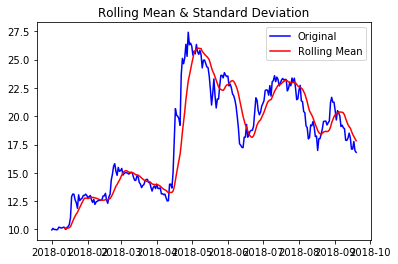

AAOI

Results of Dickey-Fuller Test:

Test Statistic                  -2.202116
p-value                          0.205478
#Lags Used                       6.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64



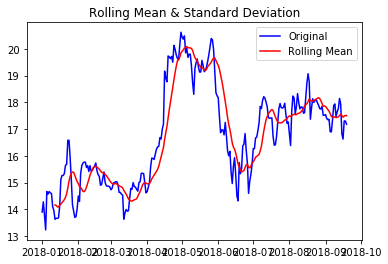

AAP

Results of Dickey-Fuller Test:

Test Statistic                  -2.221618
p-value                          0.198493
#Lags Used                       2.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64



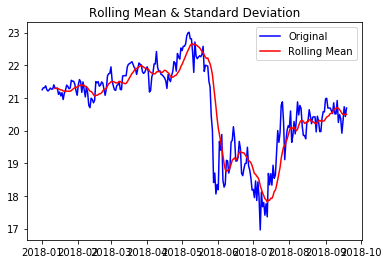

AAT

Results of Dickey-Fuller Test:

Test Statistic                  -1.951983
p-value                          0.308015
#Lags Used                       1.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64



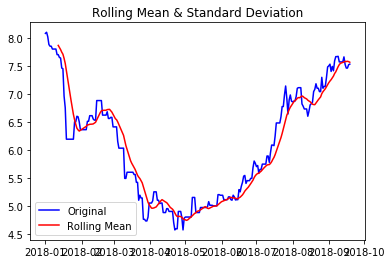

AAV

Results of Dickey-Fuller Test:

Test Statistic                  -1.572892
p-value                          0.497195
#Lags Used                       1.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64



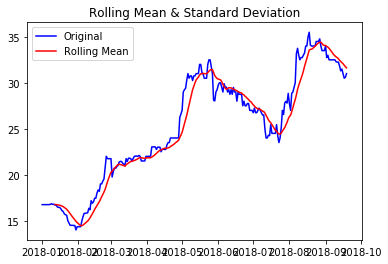

AAWW

Results of Dickey-Fuller Test:

Test Statistic                  -1.124793
p-value                          0.705084
#Lags Used                       0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64



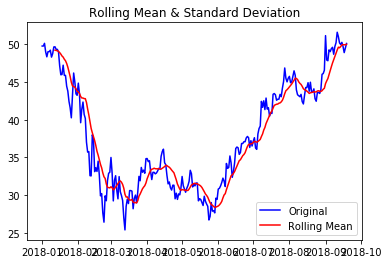

AAXJ

Results of Dickey-Fuller Test:

Test Statistic                  -1.158563
p-value                          0.691162
#Lags Used                       2.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64



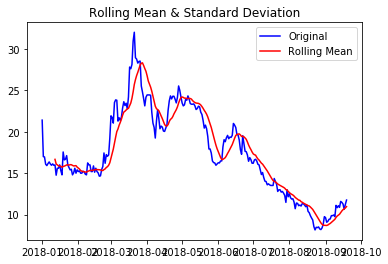

ABAC

Results of Dickey-Fuller Test:

Test Statistic                  -1.223080
p-value                          0.663590
#Lags Used                       0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64



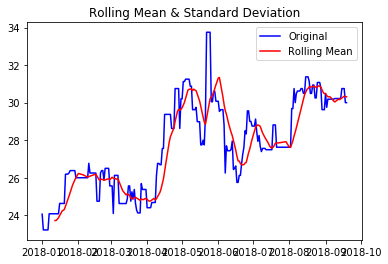

ABB

Results of Dickey-Fuller Test:

Test Statistic                  -2.162845
p-value                          0.220006
#Lags Used                       4.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64



In [44]:
for column in close_prices.columns[0:10]:
    ts = close_prices[column]
    name = column
    stationarity(ts, name)

### elimanate stationarity

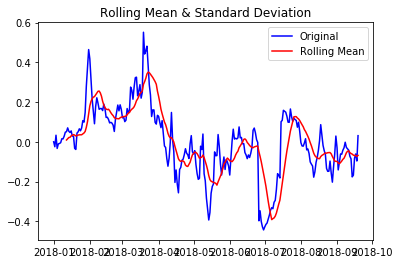

A

Results of Dickey-Fuller Test:

Test Statistic                  -2.958301
p-value                          0.038976
#Lags Used                       0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64



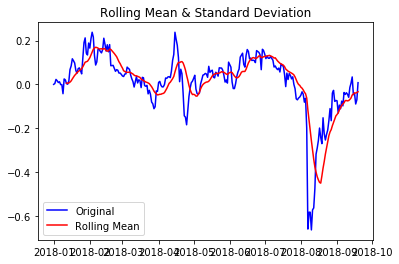

AAC

Results of Dickey-Fuller Test:

Test Statistic                  -2.381186
p-value                          0.147117
#Lags Used                       7.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64



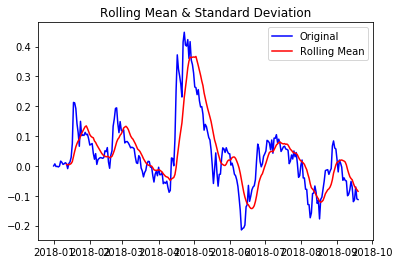

AAOI

Results of Dickey-Fuller Test:

Test Statistic                  -2.600793
p-value                          0.092834
#Lags Used                       1.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64



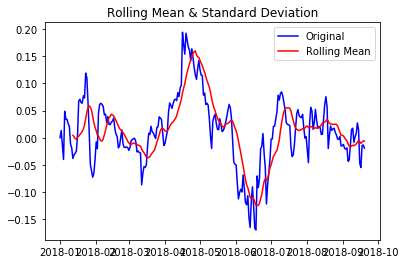

AAP

Results of Dickey-Fuller Test:

Test Statistic                  -3.181873
p-value                          0.021058
#Lags Used                       2.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64



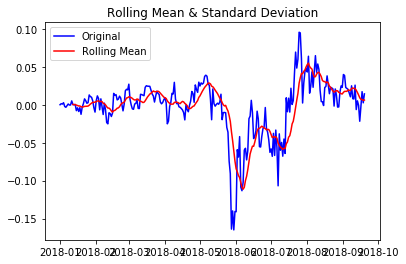

AAT

Results of Dickey-Fuller Test:

Test Statistic                  -2.556664
p-value                          0.102289
#Lags Used                       5.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64



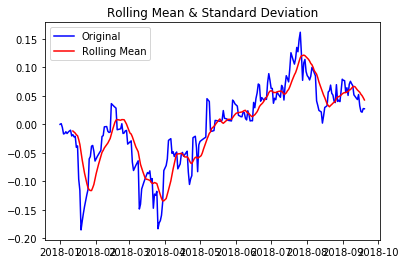

AAV

Results of Dickey-Fuller Test:

Test Statistic                  -2.182412
p-value                          0.212691
#Lags Used                       0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64



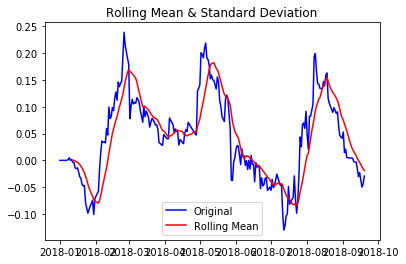

AAWW

Results of Dickey-Fuller Test:

Test Statistic                  -2.200587
p-value                          0.206032
#Lags Used                       0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64



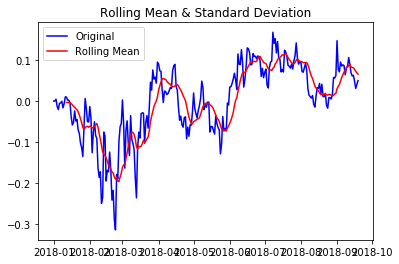

AAXJ

Results of Dickey-Fuller Test:

Test Statistic                  -2.390738
p-value                          0.144368
#Lags Used                       2.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64



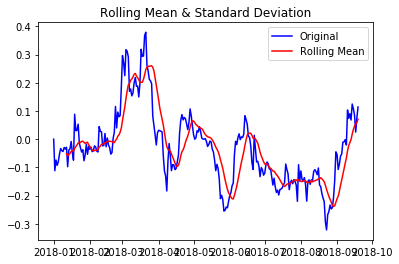

ABAC

Results of Dickey-Fuller Test:

Test Statistic                  -2.496528
p-value                          0.116321
#Lags Used                       0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64



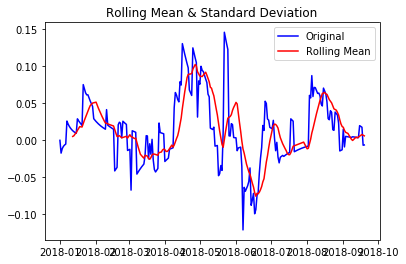

ABB

Results of Dickey-Fuller Test:

Test Statistic                  -4.190809
p-value                          0.000683
#Lags Used                       0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64



In [61]:
# exponentially weighted moving average
for column in close_prices.columns[0:10]:
    name = column
    ts = close_prices[column]
    # take log
    ts_log = np.log(ts)
    # get the exponentially weighted moving average
    expwighted_avg = ts_log.ewm(halflife=12).mean()
    # substract 
    diff = ts_log - expwighted_avg
    stationarity(diff, name)

### check & elimanite seasonality

A



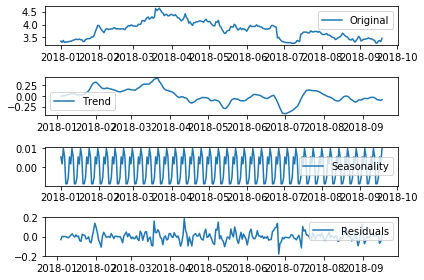

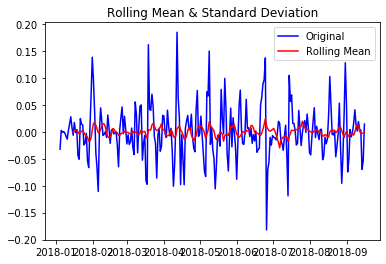

A

Results of Dickey-Fuller Test:

Test Statistic                -9.278902e+00
p-value                        1.266756e-15
#Lags Used                     8.000000e+00
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64

AAC



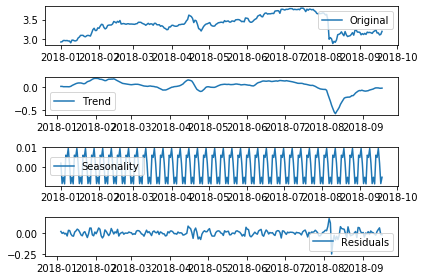

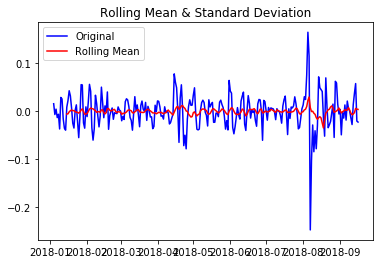

AAC

Results of Dickey-Fuller Test:

Test Statistic                -8.354617e+00
p-value                        2.931897e-13
#Lags Used                     1.200000e+01
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64

AAOI



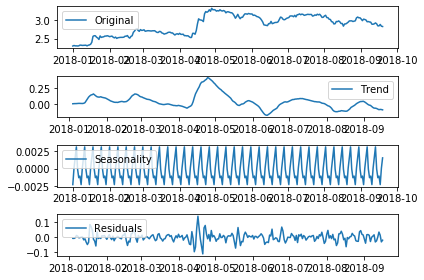

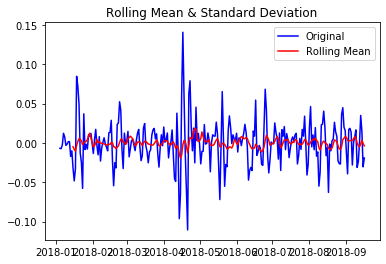

AAOI

Results of Dickey-Fuller Test:

Test Statistic                -9.393451e+00
p-value                        6.468018e-16
#Lags Used                     6.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64

AAP



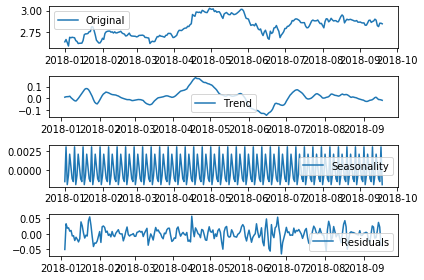

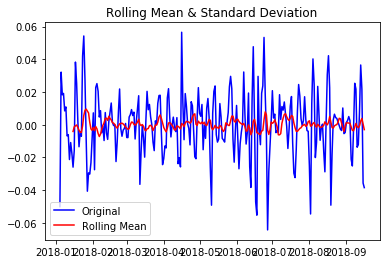

AAP

Results of Dickey-Fuller Test:

Test Statistic                -7.691026e+00
p-value                        1.419167e-11
#Lags Used                     1.500000e+01
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64

AAT



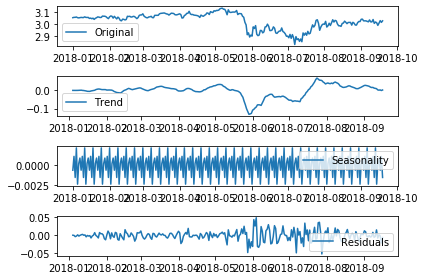

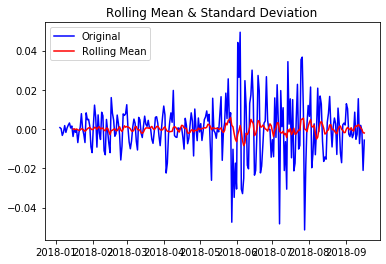

AAT

Results of Dickey-Fuller Test:

Test Statistic                -1.003608e+01
p-value                        1.539410e-17
#Lags Used                     7.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64

AAV



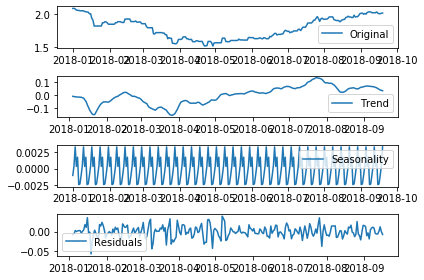

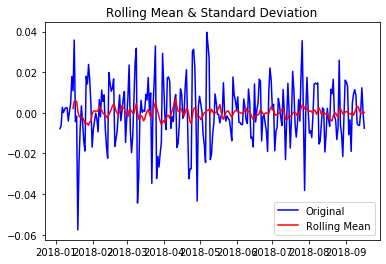

AAV

Results of Dickey-Fuller Test:

Test Statistic                -7.811345e+00
p-value                        7.056221e-12
#Lags Used                     1.200000e+01
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64

AAWW



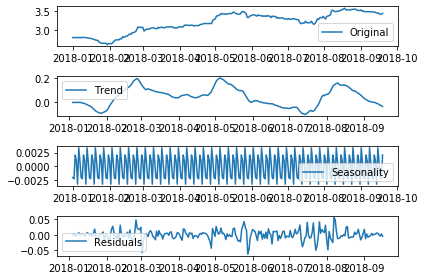

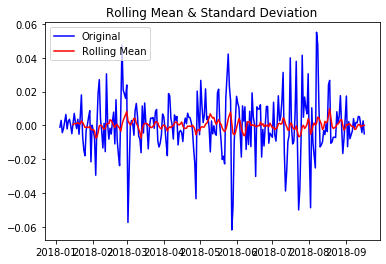

AAWW

Results of Dickey-Fuller Test:

Test Statistic                -9.157005e+00
p-value                        2.593519e-15
#Lags Used                     8.000000e+00
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64

AAXJ



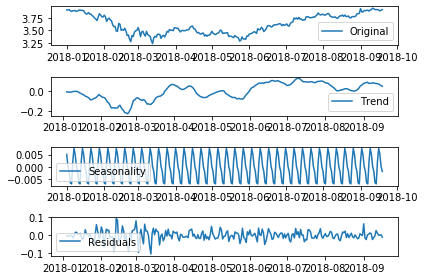

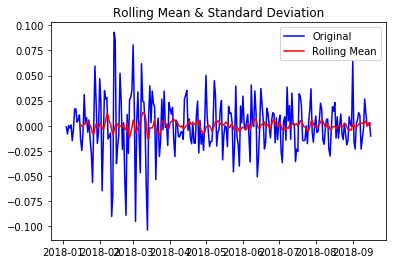

AAXJ

Results of Dickey-Fuller Test:

Test Statistic                -7.643893e+00
p-value                        1.864607e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64

ABAC



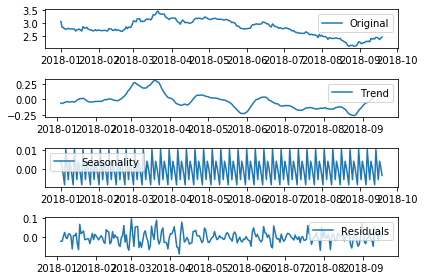

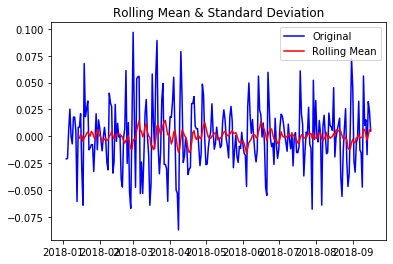

ABAC

Results of Dickey-Fuller Test:

Test Statistic                -6.924859e+00
p-value                        1.122092e-09
#Lags Used                     1.200000e+01
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64

ABB



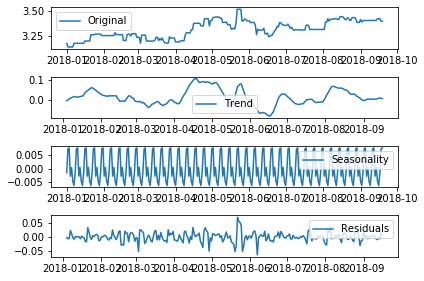

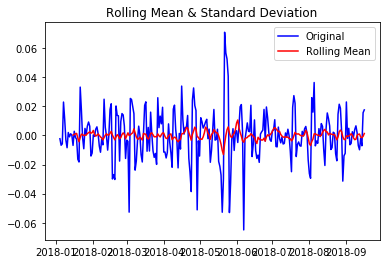

ABB

Results of Dickey-Fuller Test:

Test Statistic                -1.021104e+01
p-value                        5.637386e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64



In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
for column in close_prices.columns[0:10]:
    name = column
    ts = close_prices[column]
    # take log
    ts_log = np.log(ts)
    expwighted_avg = ts_log.ewm(halflife=12).mean()
    # substract 
    diff = ts_log - expwighted_avg
    # take the residual
    decompose = seasonality(diff, name)
    decompose.dropna(inplace=True)
    # check the stationarity
    stationarity(decompose, name)
    

### prediction

In [114]:
from pmdarima.arima import auto_arima

def autoarimafun (column, length):
    # seperate train test sets
    train, test = column[:int(length*0.95)], column[int(length*0.95):]
    # run ARIMA model
    model_autoARIMA = auto_arima(train,
                      error_action='ignore',  
                      suppress_warnings=True,
                                trace = False)
    
    # forcasting 
    forecast = model_autoARIMA.fit(train)
    forecast = model_autoARIMA.predict(n_periods=len(test))
    forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label='Prediction')
    plt.show()
    return forecast

In [137]:
from pmdarima.arima import auto_arima

def autoarima (column, length):
    # seperate train test sets
    train, test = column[:int(length*0.95)], column[int(length*0.95):]
    # run ARIMA model
    model_autoARIMA = auto_arima(train,
                      error_action='ignore',  
                      suppress_warnings=True,
                                trace = False)
    
    # forcasting 
    forecast = model_autoARIMA.fit(train)
    forecast = model_autoARIMA.predict(n_periods=len(test))
    forecast = pd.Series(forecast, index = test.index)
    return forecast

In [ ]:
for column in close_prices.columns[0:10]:
    name = column
    ts = close_prices[column]
    # take log
    ts_log = np.log(ts)
    expwighted_avg = ts_log.ewm(halflife=12).mean()
    # substract 
    diff = ts_log - expwighted_avg
    # take the residual
    decomposition = seasonal_decompose(diff)
    decompose = decomposition.resid
    decompose.dropna(inplace=True)
    length = len(decompose)
    # run auto-arima
    # get the predictions
    print(name)
    forcast = autoarimafun(decompose, length)
    # 

### Taking back to original scale

A


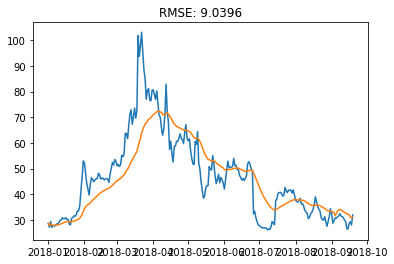

AAC


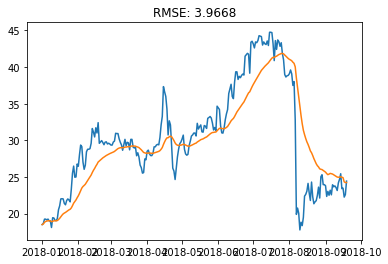

AAOI


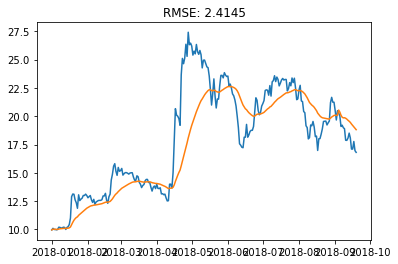

AAP


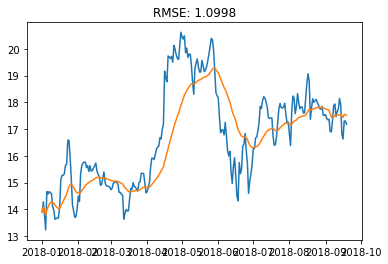

AAT


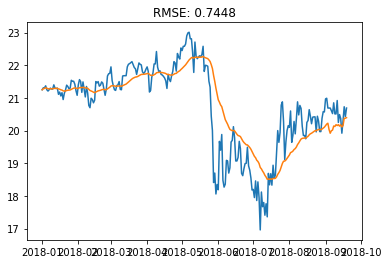

AAV


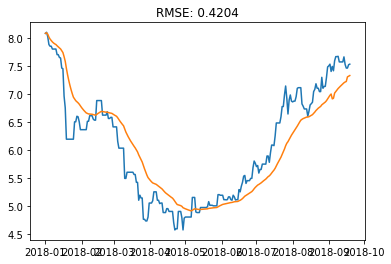

AAWW


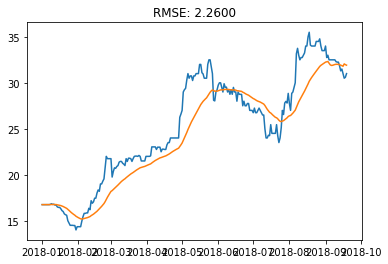

AAXJ


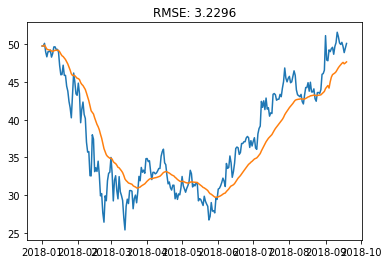

ABAC


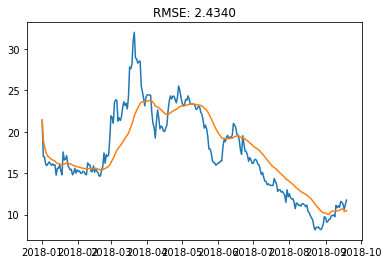

ABB


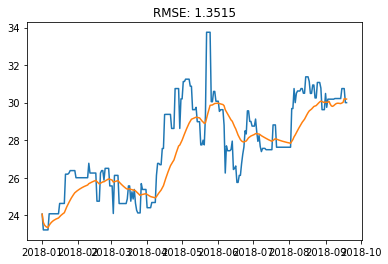

ABBV


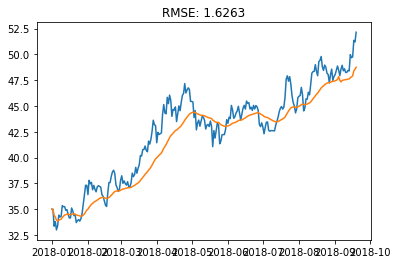

ABCD


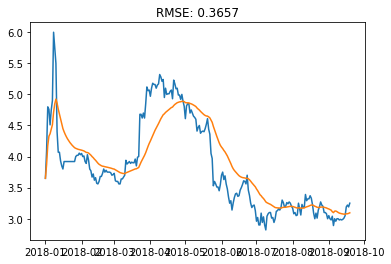

ABDC


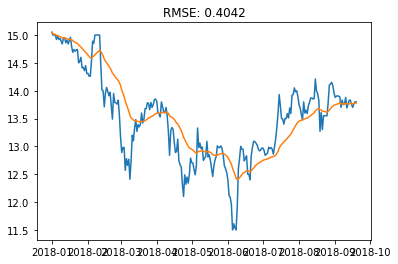

ABEO


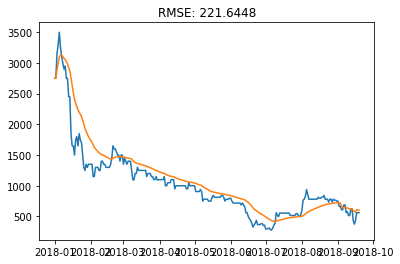

ABEV


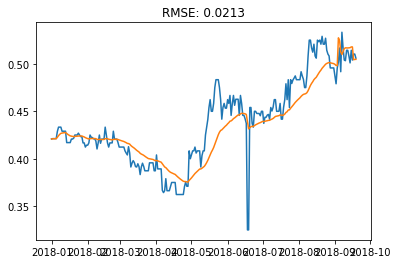

ABG


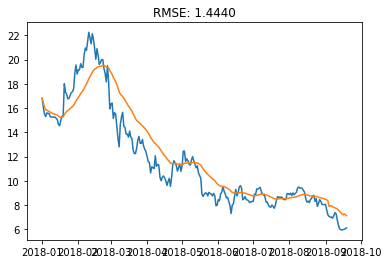

ABIO


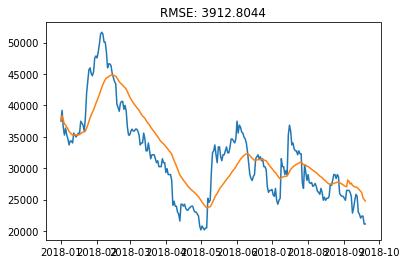

ABR


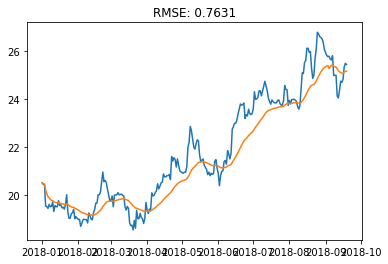

ABTX


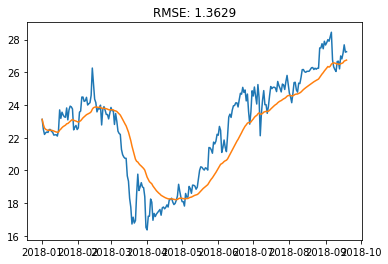

ABUS


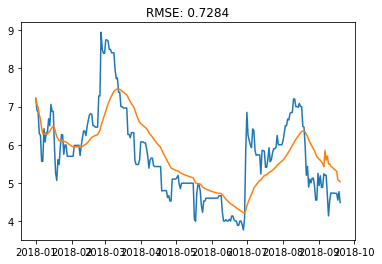

AC


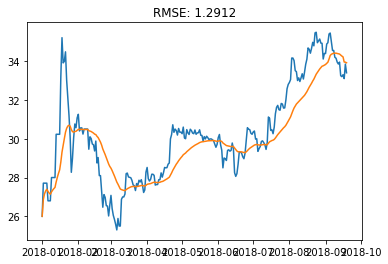

ACAD


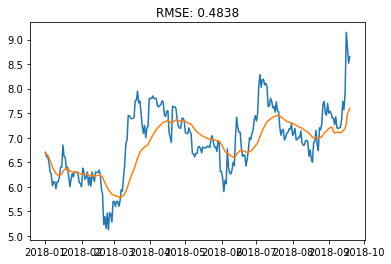

ACBI


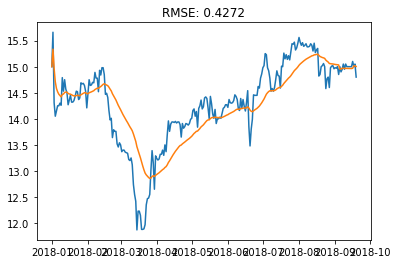

ACC


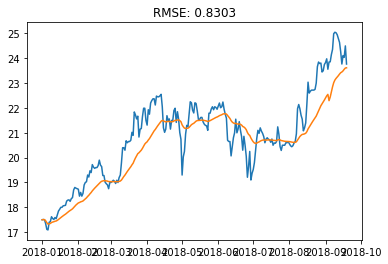

ACCO


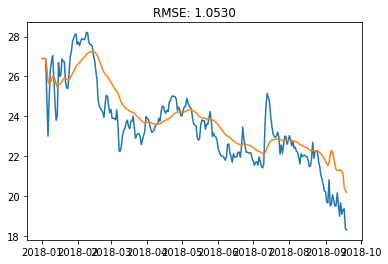

ACFC


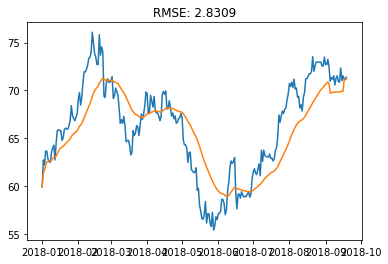

ACGLP


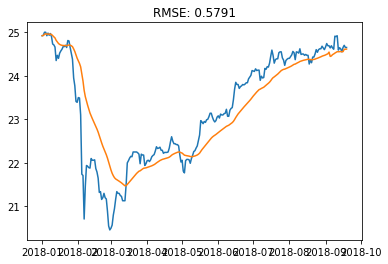

ACH


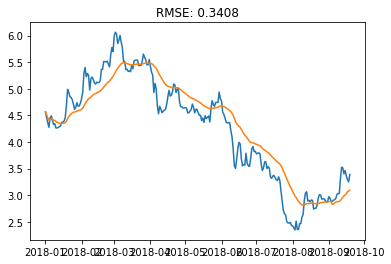

ACHC


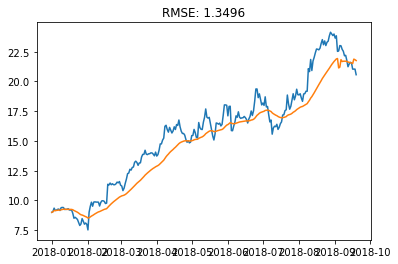

ACHN


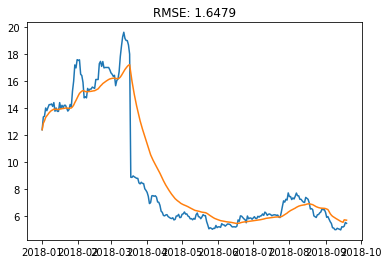

ACIA


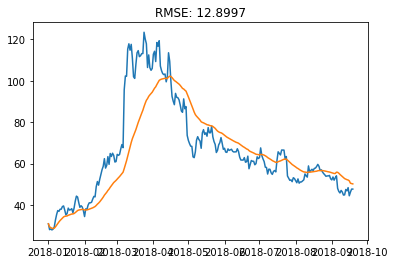

ACLS


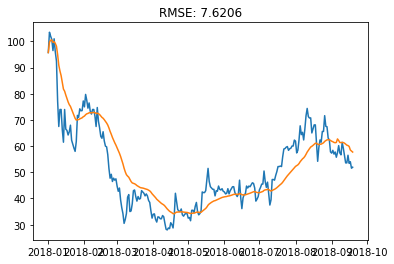

ACM


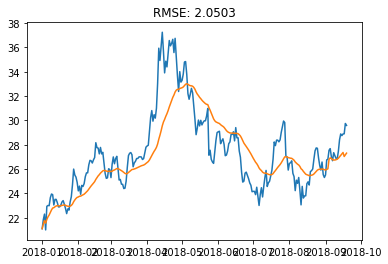

ACN


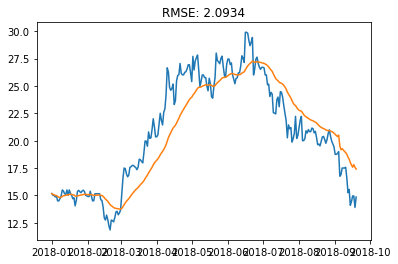

ACOR


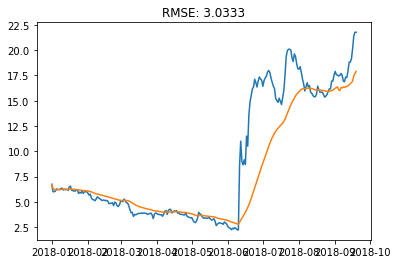

ACP


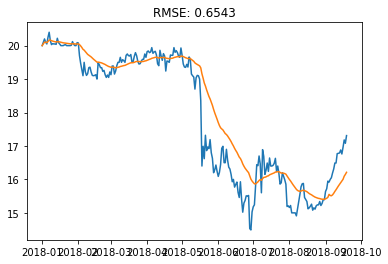

ACRE


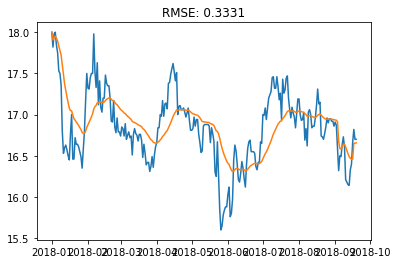

ACRS


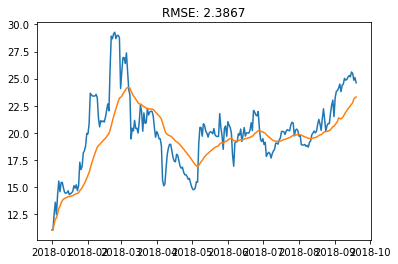

ACRX


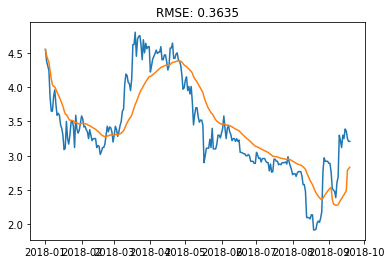

ACSF


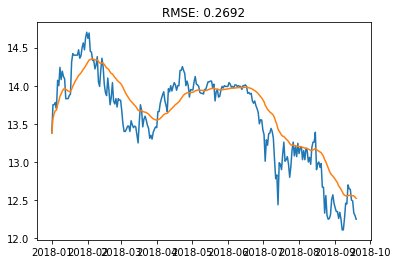

ACST


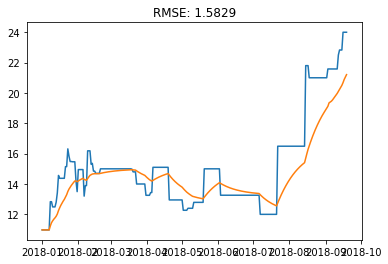

ACTG


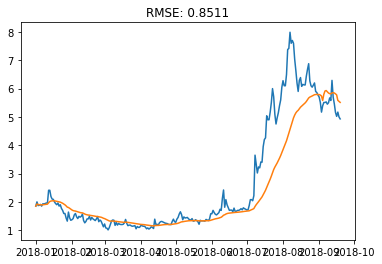

ACV


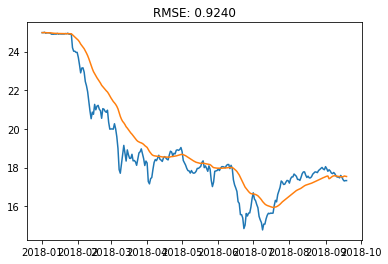

ACWI


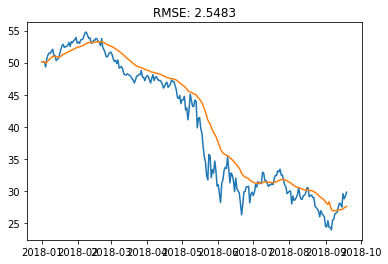

ACWX


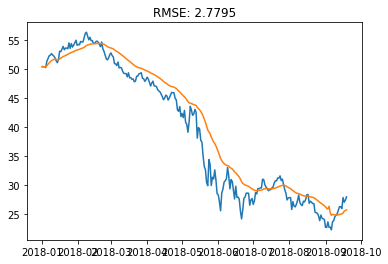

ADAP


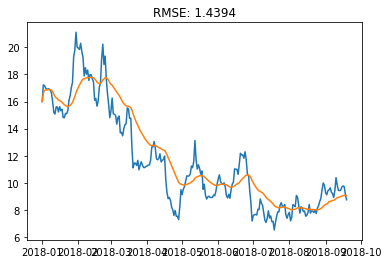

ADES


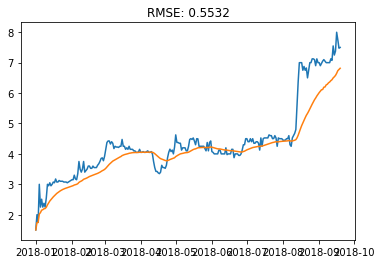

ADMA


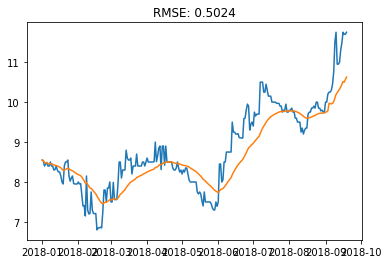

ADMS


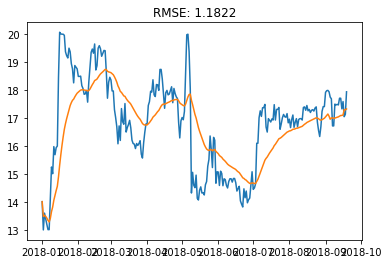

ADNT


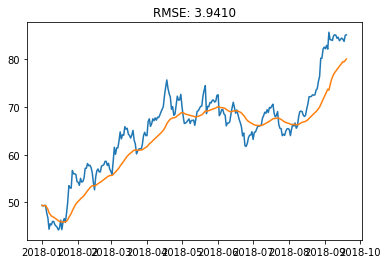

ADOM


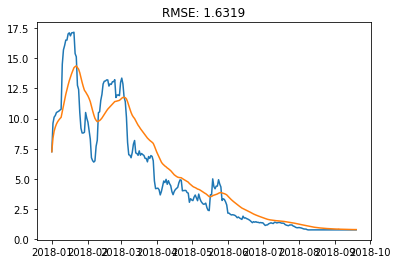

ADRA


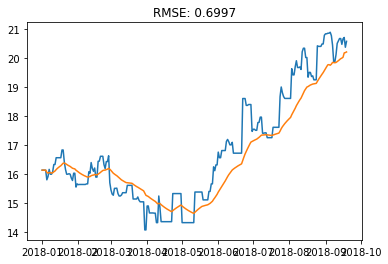

ADRD


C:\Users\Shuyu\AppData\Roaming\Python\Python36\site-packages\pmdarima\arima\auto.py:328: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


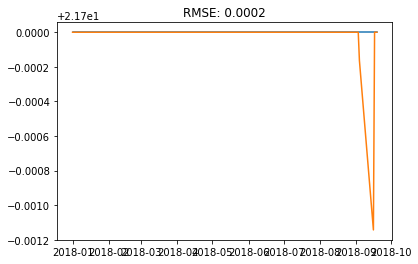

ADRE


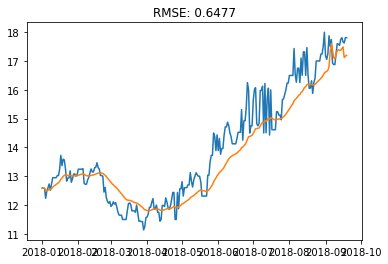

ADRO


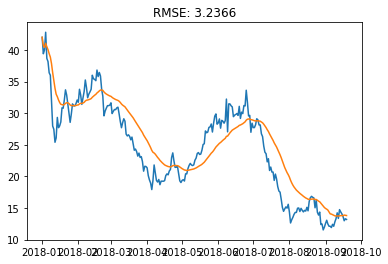

ADRU


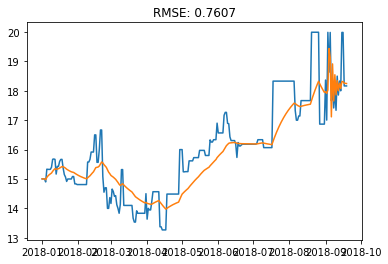

ADS


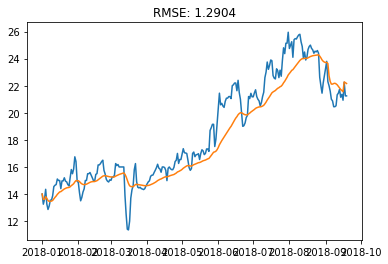

ADSW


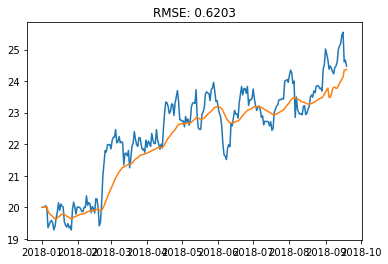

ADVM


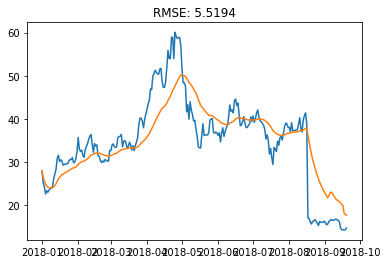

AEHR


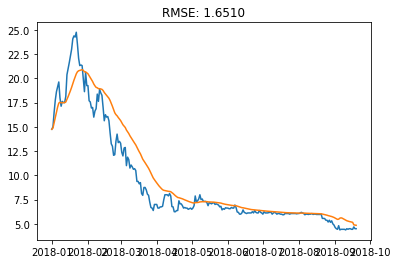

AEL


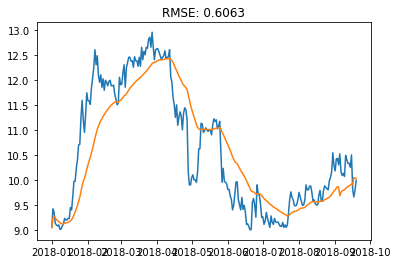

AEMD


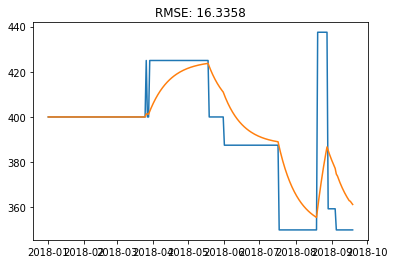

AER


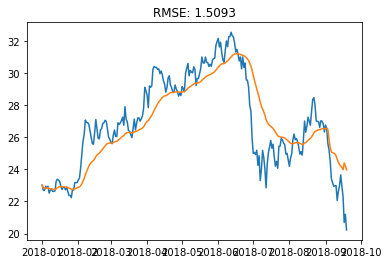

AERI


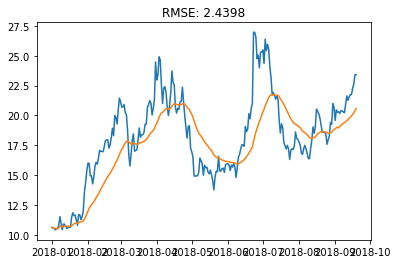

AETI


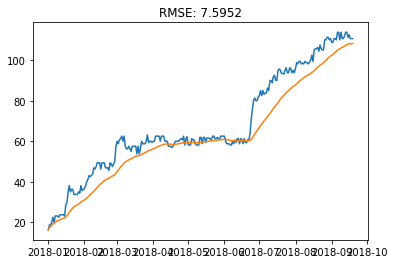

AEUA


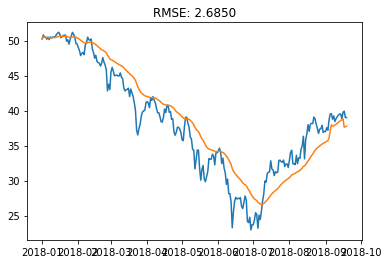

AEZS


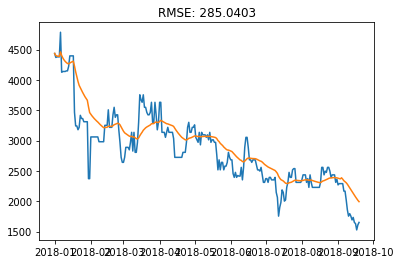

AFB


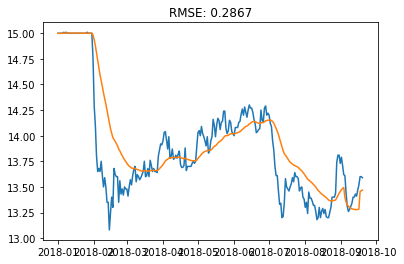

AFH


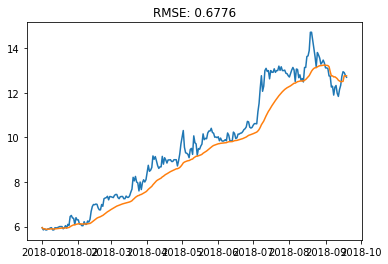

AFI


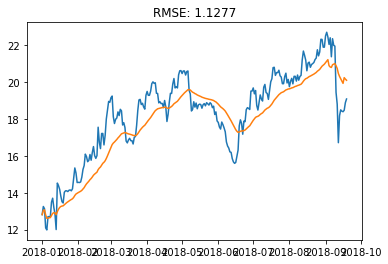

AFMD


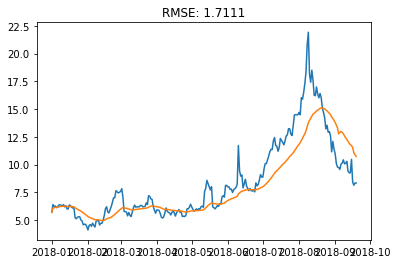

AFSI


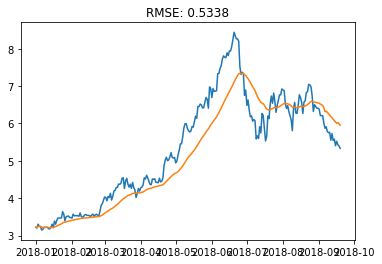

AFT


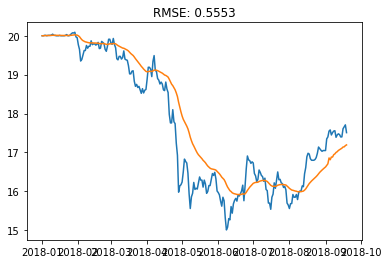

AG


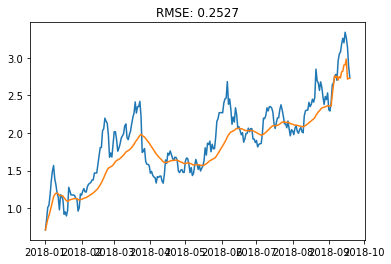

AGC


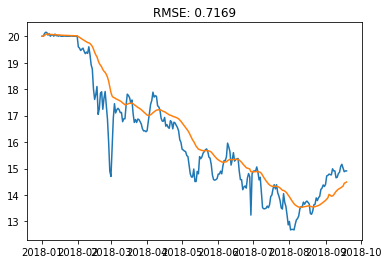

AGD


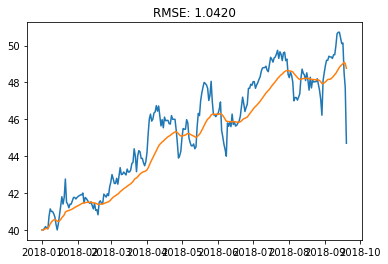

AGEN


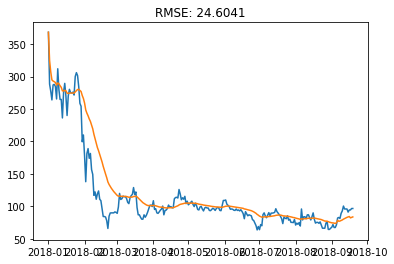

AGI


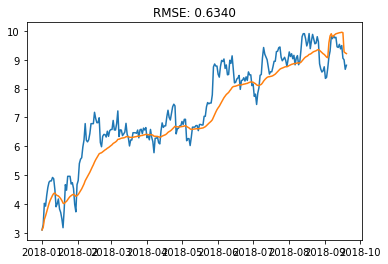

AGIO


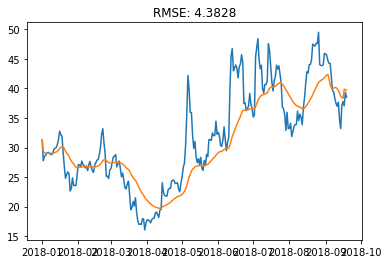

AGLE


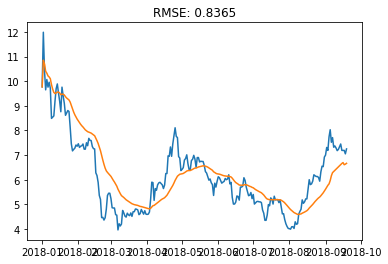

AGNCB


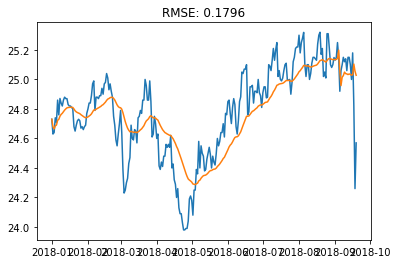

AGND


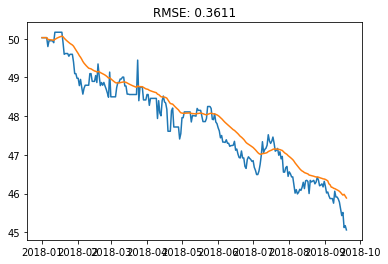

AGO


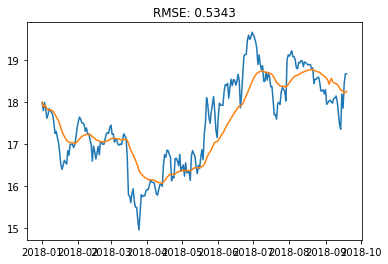

AGR


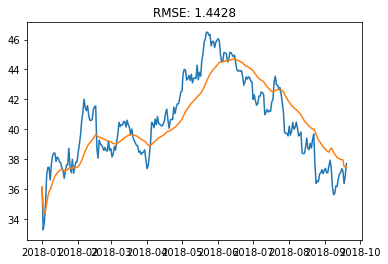

AGRO


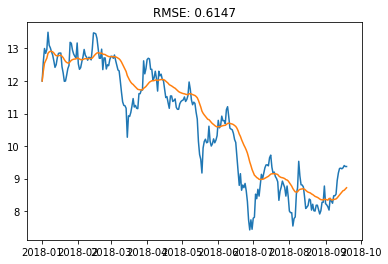

AGRX


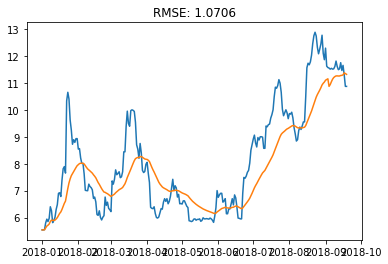

AGTC


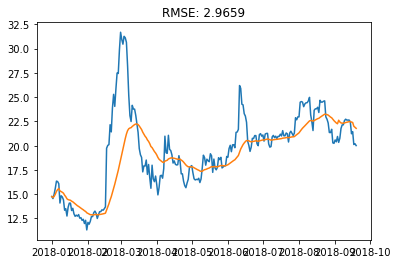

AGZD


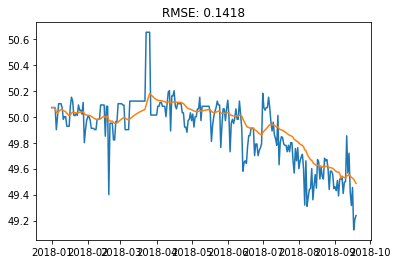

AHC


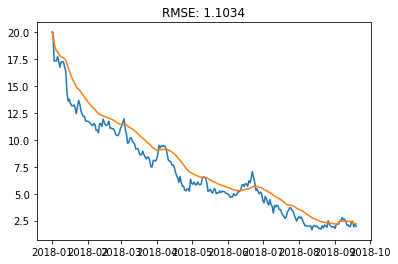

AHGP


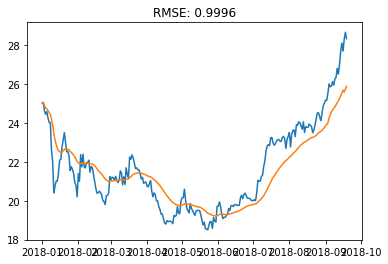

AHH


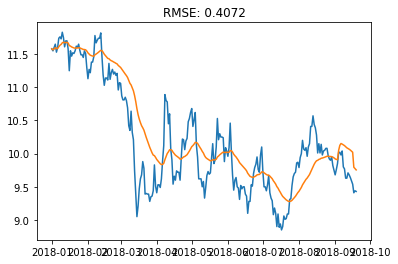

AHL


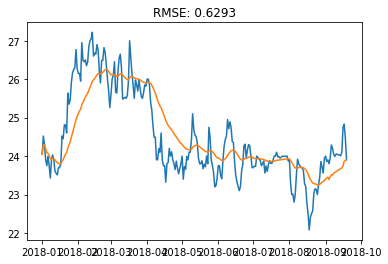

AHP


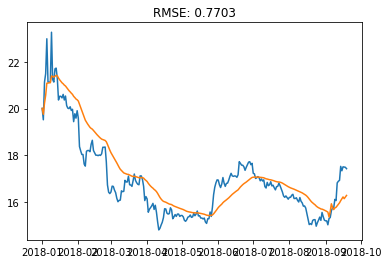

AHPA


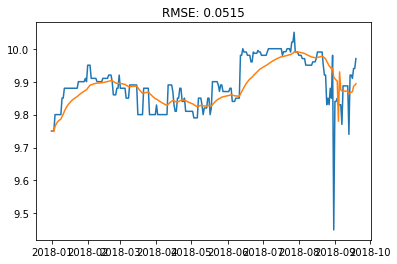

AHPAU


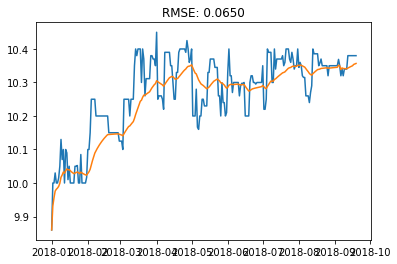

AHT


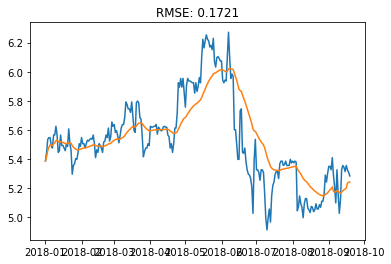

AI


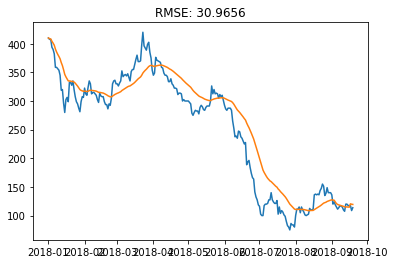

AIA


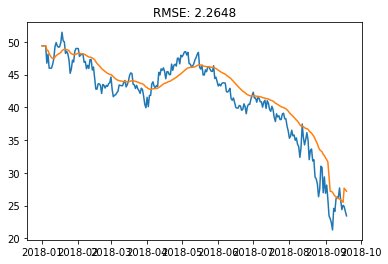

AIF


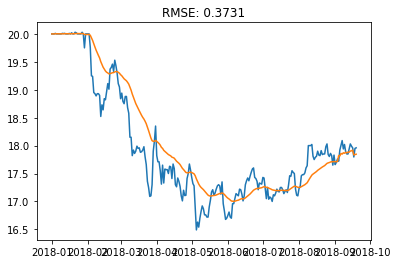

AIMC


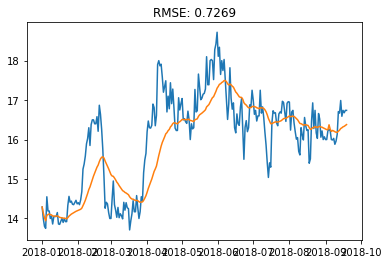

In [139]:
for column in close_prices.columns[0:100]:
    name = column
    ts = close_prices[column]
    # take log
    ts_log = np.log(ts)
    expwighted_avg = ts_log.ewm(halflife=12).mean()
    # substract 
    diff = ts_log - expwighted_avg
    # take the residual
    decomposition = seasonal_decompose(diff)
    decompose = decomposition.resid
    decompose.dropna(inplace=True)
    length = len(decompose)
    # run auto-arima
    # get the predictions
    print(name)
    forcast_diff = autoarima(decompose, length)
    cumsum = forcast_diff.cumsum()
    forcast_diff = forcast_diff.add(cumsum, fill_value=0)
    forcast_diff = forcast_diff.add(expwighted_avg, fill_value=0)
    pred = np.exp(forcast_diff)
    plt.plot(ts)
    plt.plot(pred)
    plt.title('RMSE: %.4f'% np.sqrt(sum((pred-ts)**2)/len(ts)))
    plt.show()